# POSTTEST5 - Supervised Machine Learning

><p> Nama : Tito Darmawan <br> NIM : 2109106042 <br> Dataset : </p>

[Goodreads-books](https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks)

## Import dan Info Dataset

In [145]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

df = pd.read_csv(
    "books.csv", 
    on_bad_lines="skip"
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


## Pelabelan Dataset
> <b> Dataset dilabeli dengan keterangan yang isinya gabungan 2 ketentuan :
  <br> 1. Ketebalan buku berdasarkan jumlah lembar yang ada dimana 0 - 2000 "tipis", 2001 - 4000 "tebal", dan 4001 keatas sebagai "sangat tebal".
  <br> 2. Keterangan Rekomendasi buku berdasarkan rata-rata rating yang ada dimana 0.00 - 2.99 "Kurang", 3.00 - 3.99 "Lumayan", dan 4.00 - 5.00 "Direkomendasikan".
  <b>
### Ketebalan

In [146]:
df.loc[
    (df['  num_pages'] >= 0)& 
    (df['  num_pages'] <= 2000), 
    'ketebalan'
] = "Tipis"

df.loc[
    (df['  num_pages'] > 2000)& 
    (df['  num_pages'] <= 4000), 
    'ketebalan'
] = "Tebal"

df.loc[
    (df['  num_pages'] > 4000), 
    'ketebalan'
] = "Sangat Tebal"

print("Pengecekan Penambahan Label 1 :")
df[["  num_pages", "ketebalan"]].head()

Pengecekan Penambahan Label 1 :


,num_pages,ketebalan
0,652,Tipis
1,870,Tipis
2,352,Tipis
3,435,Tipis
4,2690,Tebal


### Rekomendasi

In [147]:
df.loc[
    (df['average_rating'] >= 0.00)& 
    (df['average_rating'] <= 2.99), 
    'rekomendasi'
] = "Kurang"

df.loc[
    (df['average_rating'] >= 3.00)& 
    (df['average_rating'] <= 3.99), 
    'rekomendasi'
] = "Lumayan"

df.loc[
    (df['average_rating'] >= 4.00)& 
    (df['average_rating'] <= 5.00), 
    'rekomendasi'
] = "Direkomendasikan"

print("Pengecekan Penambahan Label 2 :")
df[["average_rating", "rekomendasi"]].tail()

Pengecekan Penambahan Label 2 :


,average_rating,rekomendasi
11118,4.06,Direkomendasikan
11119,4.08,Direkomendasikan
11120,3.96,Lumayan
11121,3.72,Lumayan
11122,3.91,Lumayan


In [148]:
df["keterangan"] = df[["ketebalan", "rekomendasi"]].apply(" ".join, axis=1)
df.drop('ketebalan', inplace=True, axis=1)
df.drop('rekomendasi', inplace=True, axis=1)

In [160]:
print("Label keterangan buku : ")
df[["average_rating", "  num_pages", "keterangan"]].head()

Label keterangan buku : 


,average_rating,num_pages,keterangan
0,4.57,652,Tipis Direkomendasikan
1,4.49,870,Tipis Direkomendasikan
2,4.42,352,Tipis Direkomendasikan
3,4.56,435,Tipis Direkomendasikan
4,4.78,2690,Tebal Direkomendasikan


## Buat Dataset Train dan Test

In [150]:
X = df[["  num_pages", "average_rating"]]
y = df["keterangan"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Pembagian Dataset : \n")
print("Dimensi X_train", X_train.shape)
print("Dimensi X_test", X_test.shape)
print("Dimensi y_train", y_train.shape)
print("Dimensi y_test", y_test.shape)

Pembagian Dataset : 

Dimensi X_train (8898, 2)
Dimensi X_test (2225, 2)
Dimensi y_train (8898,)
Dimensi y_test (2225,)


In [151]:
y_train.unique()

#Dataset train tidak menghasilkan semua kombinasi yang ada dari kedua label 
#Sehingga ada kemungkinan hanya ketebalan atau rekomendasi dari buku saja yang ter prediksi

#Label yang tidak ada "Tebal Kurang", "Tebal Lumayan", " Sangat Tebal Kurang", dan "Sangat Tebal Lumayan". 
#Maka agar Model bekerja dengan baik perlu adanya penambahan data yang memenuhi nyarat label yang tidak ada di atas pada dataset 
#Dan mengulang semua proses di atas dengan dataset yang lebih bagus

array(['Tipis Lumayan', 'Tipis Direkomendasikan', 'Tipis Kurang',
       'Tebal Direkomendasikan', 'Sangat Tebal Direkomendasikan'],
      dtype=object)

## Algoritma KNN

In [152]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

print("Score :")
knn.score(X_train, y_train)

Score :


0.9345920431557654

In [153]:
buku1 = [[4321, 4.59]]
buku2 = [[13, 2.88]]

print("Test Prediksi :")
knn.predict(buku1)

Test Prediksi :


d:\Code\venv_A2-21\Tito_042\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Tebal Direkomendasikan'], dtype=object)

In [154]:
print("Test Prediksi :")
knn.predict(buku2)

Test Prediksi :


d:\Code\venv_A2-21\Tito_042\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Tipis Lumayan'], dtype=object)

## Algoritma Decission Tree

In [155]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print(f"Akurasi Training Decision Tree : {dt.score(X_train, y_train)}")
print(f"Akurasi Test Decision Tree     : {dt.score(X_test, y_test)}")

Akurasi Training Decision Tree : 1.0
Akurasi Test Decision Tree     : 1.0


In [156]:
print("Test Prediksi :")
dt.predict(buku1) 

Test Prediksi :


d:\Code\venv_A2-21\Tito_042\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Sangat Tebal Direkomendasikan'], dtype=object)

In [157]:
dt.predict(buku2)

d:\Code\venv_A2-21\Tito_042\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Tipis Kurang'], dtype=object)

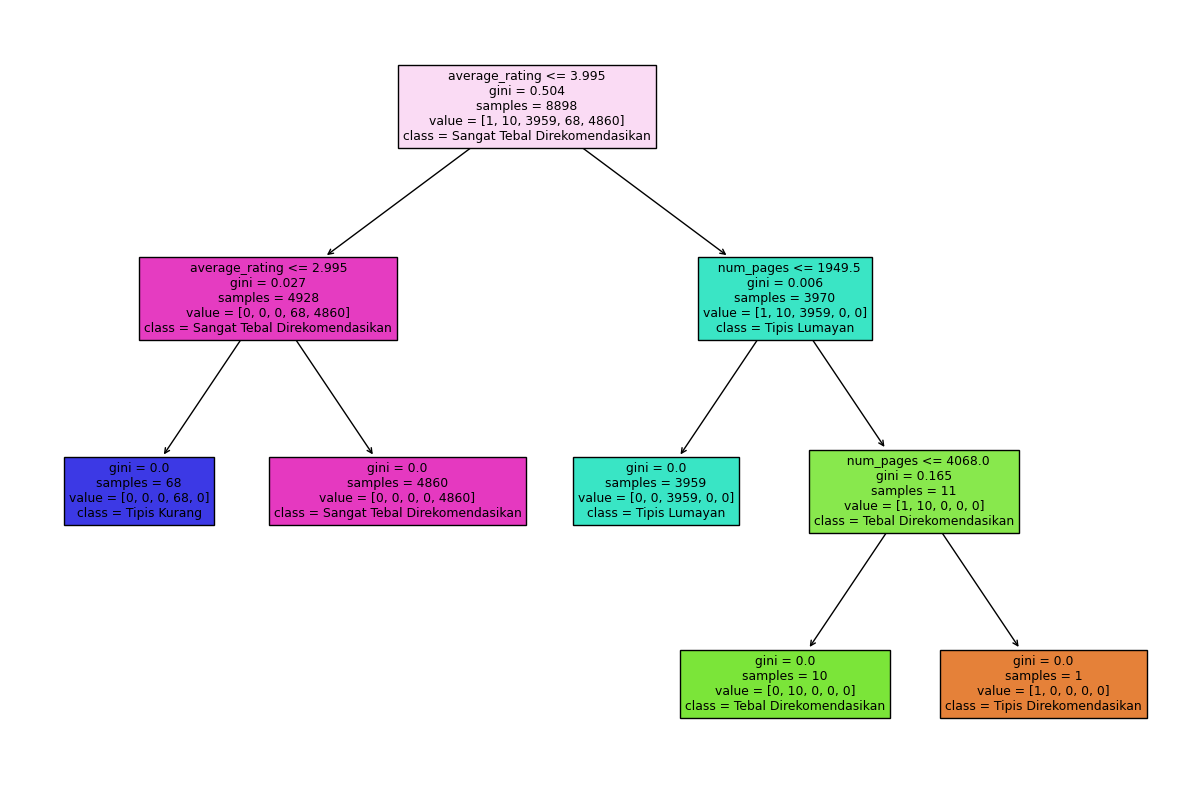

In [158]:
plt.figure(figsize = (15, 10))
tree.plot_tree(dt, feature_names = X.columns, filled = True, class_names = y.unique())
plt.show()